<a href="https://colab.research.google.com/github/EmiLaPiola/NumLabIMC/blob/main/Tp_imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, requests
from PIL import Image
from io import BytesIO
import numpy as np
from tqdm import tqdm
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import models, transforms
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import os, requests
from PIL import Image
from io import BytesIO
from tqdm import tqdm


Primero generamos 10 imagenes reales y 10 imagenes sinteticas . Tambien nos guardamos 5 de estas imagenes para testeo

/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch
Loading networks from "ffhq.pkl"...
Generating image for seed 0 (0/10) ...
Setting up PyTorch plugin "bias_act_plugin"... W1028 20:11:19.078000 20940 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1028 20:11:19.078000 20940 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... W1028 20:11:42.421000 20940 torch/utils/cpp_extension.py:2425] TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
W1028 20:11:42.421000 20940 torch/utils/cpp_extension.py:2425] If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'] to specific architectures.
Done.
/content/stylegan2-ada-pytorch/stylegan2-ada-pytorch/generate.py:121: DeprecationWarning: 'mode' parameter is deprecated and will be re

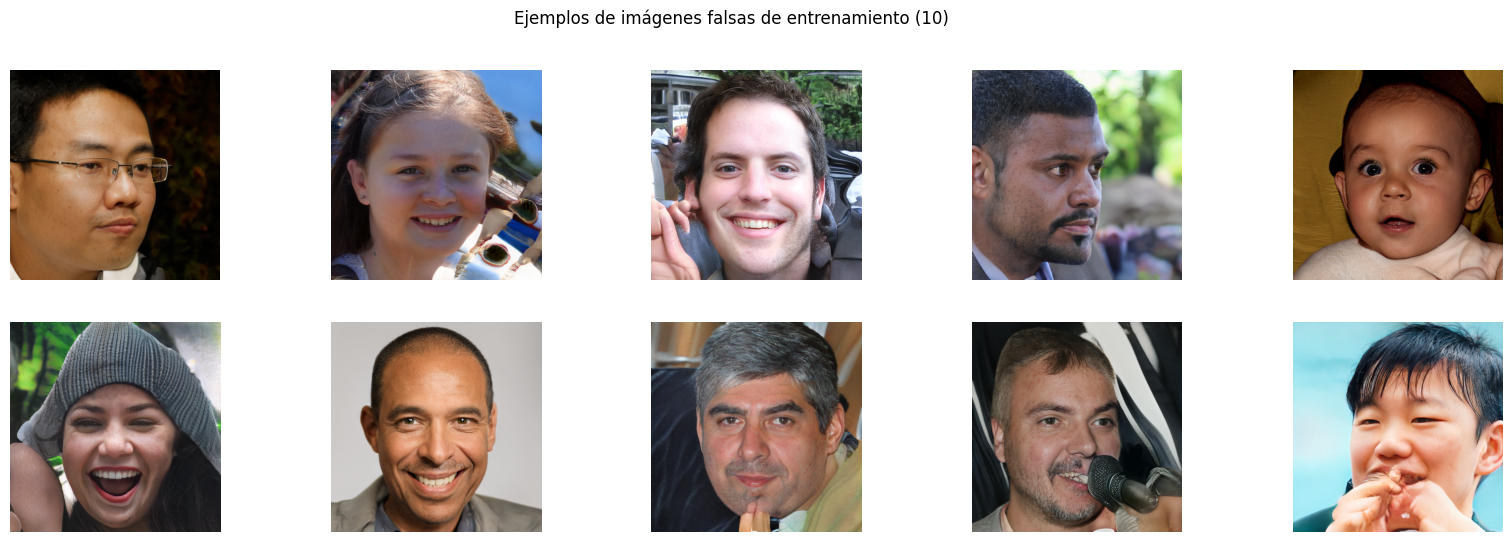

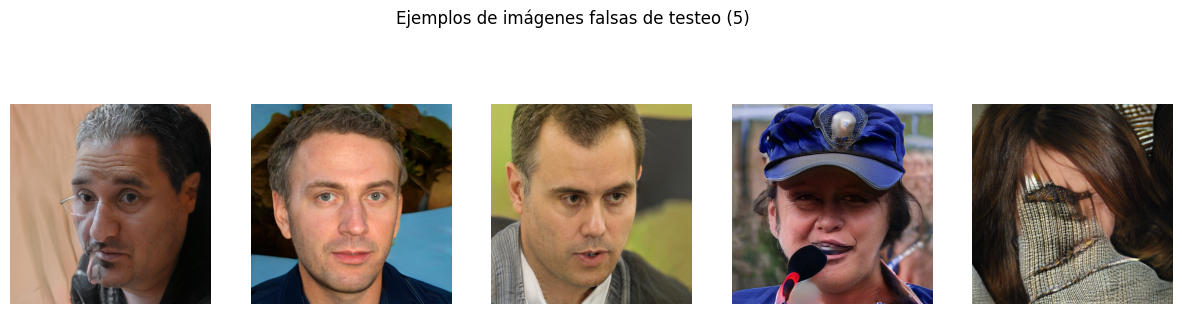

In [42]:
# ===============================
# Generar imágenes falsas con StyleGAN2 (Colab)
# ===============================

# Nos aseguramos de estar en la carpeta correcta
%cd stylegan2-ada-pytorch

import os, glob, random
from PIL import Image
import matplotlib.pyplot as plt

# ===============================
# Carpetas
# ===============================
train_fake_dir = '../fake_faces_large/sinteticas'
test_fake_dir  = '../fake_faces_test/sinteticas'

os.makedirs(train_fake_dir, exist_ok=True)
os.makedirs(test_fake_dir, exist_ok=True)

# ===============================
# Generar imágenes de entrenamiento (10)
# ===============================
!python generate.py --outdir={train_fake_dir} --trunc=1 --seeds=0-9 --network=ffhq.pkl

# ===============================
# Generar imágenes de testeo (5)
# ===============================
!python generate.py --outdir={test_fake_dir} --trunc=1 --seeds=10-14 --network=ffhq.pkl

# ===============================
# Mostrar imágenes de entrenamiento
# ===============================
train_imgs = glob.glob(os.path.join(train_fake_dir, '*.png'))
sample_train = random.sample(train_imgs, min(10, len(train_imgs)))

plt.figure(figsize=(20,6))
for i, img_path in enumerate(sample_train):
    img = Image.open(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes falsas de entrenamiento (10)")
plt.show()

# ===============================
# Mostrar imágenes de testeo
# ===============================
test_imgs = glob.glob(os.path.join(test_fake_dir, '*.png'))
sample_test = random.sample(test_imgs, min(5, len(test_imgs)))

plt.figure(figsize=(15,4))
for i, img_path in enumerate(sample_test):
    img = Image.open(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes falsas de testeo (5)")
plt.show()


Descargando imágenes en /content/fake_faces_large/reales: 100%|██████████| 10/10 [00:00<00:00, 25.89it/s]



✅ Imágenes descargadas en /content/fake_faces_large/reales: 0


Descargando imágenes en /content/fake_faces_test/reales: 100%|██████████| 5/5 [00:00<00:00, 26.77it/s]



✅ Imágenes descargadas en /content/fake_faces_test/reales: 0


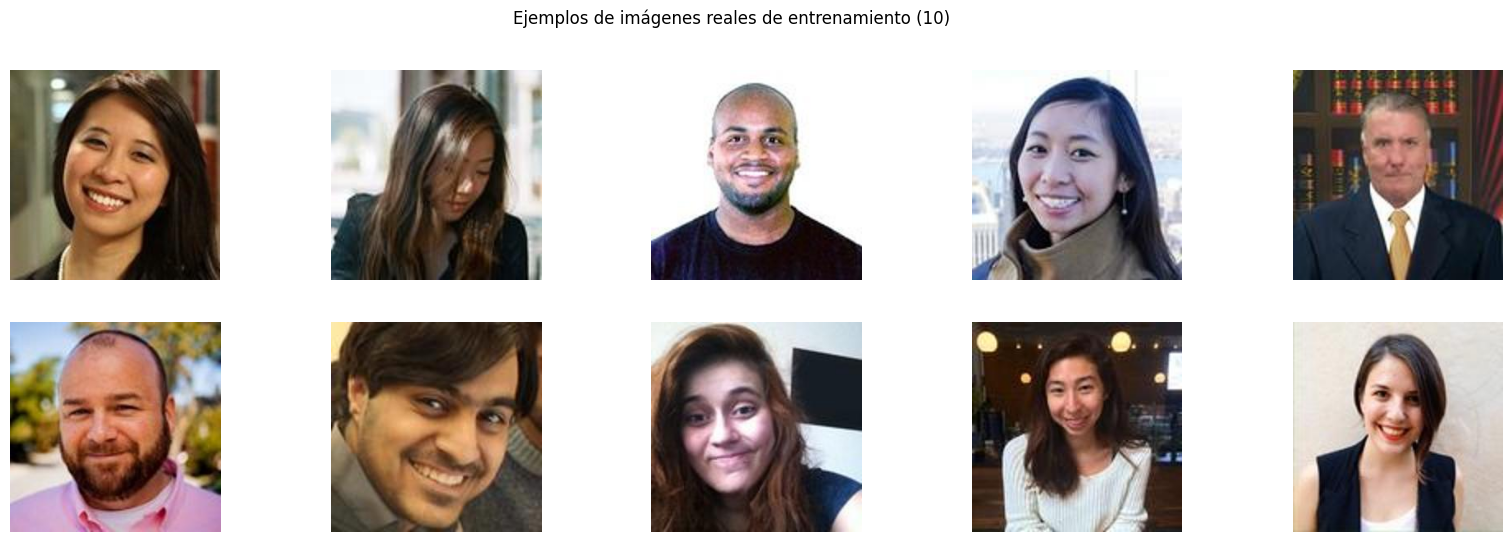

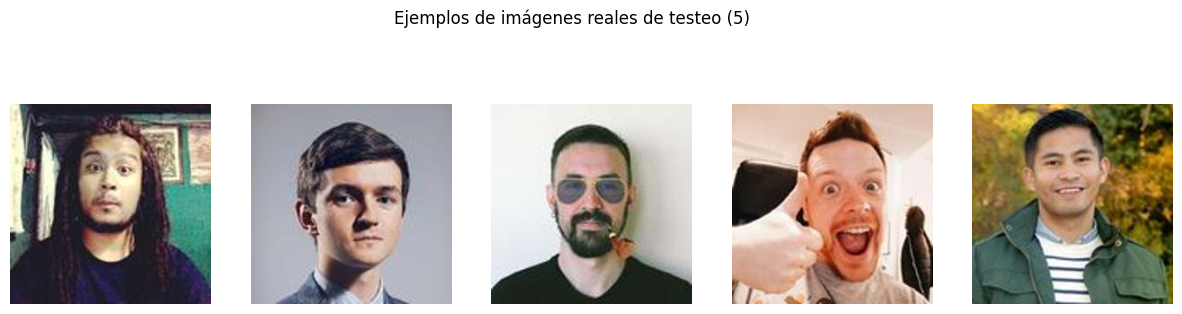

In [43]:

# ahora generamos las imagenes reales 10 para entrenar 5 para testear :


# ===============================
# Generar imágenes reales (RandomUser) para entrenamiento y testeo
# ===============================

import os, glob, random, requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
from tqdm import tqdm

# ===============================
# Carpetas
# ===============================
train_real_dir = '/content/fake_faces_large/reales'
test_real_dir  = '/content/fake_faces_test/reales'

os.makedirs(train_real_dir, exist_ok=True)
os.makedirs(test_real_dir, exist_ok=True)

# ===============================
# URLs de entrenamiento (10)
# ===============================
train_real_urls = [f"https://randomuser.me/api/portraits/men/{i}.jpg" for i in range(5)]
train_real_urls += [f"https://randomuser.me/api/portraits/women/{i}.jpg" for i in range(5)]

# ===============================
# URLs de testeo (5)
# ===============================
test_real_urls = [f"https://randomuser.me/api/portraits/men/{i}.jpg" for i in range(50,53)]
test_real_urls += [f"https://randomuser.me/api/portraits/women/{i}.jpg" for i in range(50,52)]

# ===============================
# Función para descargar imágenes
# ===============================
def descargar_imagenes(urls, carpeta):
    descargadas = 0
    for i, url in enumerate(tqdm(urls, desc=f"Descargando imágenes en {carpeta}")):
        try:
            r = requests.get(url, timeout=15)
            img = Image.open(BytesIO(r.content)).convert("RGB")
            img = img.resize((256, 256))
            nombre = os.path.join(carpeta, f"real_{i+1}.jpg")
            if not os.path.exists(nombre):
                img.save(nombre)
                descargadas += 1
        except Exception as e:
            print(f"❌ Error en imagen {i+1}: {e}")
    print(f"\n✅ Imágenes descargadas en {carpeta}: {descargadas}")

# ===============================
# Descargar entrenamiento y test
# ===============================
descargar_imagenes(train_real_urls, train_real_dir)
descargar_imagenes(test_real_urls, test_real_dir)

# ===============================
# Mostrar imágenes de entrenamiento
# ===============================
train_imgs = glob.glob(os.path.join(train_real_dir, '*.jpg'))
sample_train = random.sample(train_imgs, min(10, len(train_imgs)))

plt.figure(figsize=(20,6))
for i, img_path in enumerate(sample_train):
    img = Image.open(img_path)
    plt.subplot(2,5,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes reales de entrenamiento (10)")
plt.show()

# ===============================
# Mostrar imágenes de testeo
# ===============================
test_imgs = glob.glob(os.path.join(test_real_dir, '*.jpg'))
sample_test = random.sample(test_imgs, min(5, len(test_imgs)))

plt.figure(figsize=(15,4))
for i, img_path in enumerate(sample_test):
    img = Image.open(img_path)
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
plt.suptitle("Ejemplos de imágenes reales de testeo (5)")
plt.show()




modelo :

In [44]:
import os, torch, numpy as np, random
from PIL import Image
from torchvision import transforms, models
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

# ===============================
# Dataset SIMPLE (sin shuffle interno)
# ===============================
class FaceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.real_dir = os.path.join(root_dir, "reales")
        self.fake_dir = os.path.join(root_dir, "sinteticas")

        self.real_imgs = [(os.path.join(self.real_dir, f), 1.0)
                          for f in sorted(os.listdir(self.real_dir))
                          if f.endswith((".jpg", ".png"))]
        self.fake_imgs = [(os.path.join(self.fake_dir, f), 0.0)
                          for f in sorted(os.listdir(self.fake_dir))
                          if f.endswith((".jpg", ".png"))]

        self.samples = self.real_imgs + self.fake_imgs
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.float32)

# ===============================
# Transformaciones
# ===============================
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ===============================
# Modelo SIMPLE
# ===============================
class FakeFaceClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        num_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_features, 1)

    def forward(self, x):
        return self.backbone(x).squeeze(1)

# ===============================
# Entrenamiento DIRECTO
# ===============================
def train_model_all(model, dataset, device, epochs=20, batch_size=4):
    model.train()
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

    for epoch in range(epochs):
        total_loss = 0
        for imgs, labels in loader:
            imgs, labels = imgs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} | Loss: {total_loss/len(loader):.4f}")

    torch.save(model.state_dict(), "modelo_entrenado_10x10.pth")
    print("✅ Entrenamiento finalizado y modelo guardado")

# ===============================
# EJECUTAR
# ===============================
dataset_root = "/content/fake_faces_large"  # carpeta con 10 reales + 10 falsas
dataset = FaceDataset(dataset_root, transform=transform)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FakeFaceClassifier().to(device)

train_model_all(model, dataset, device, epochs=5, batch_size=4)

# Guardamos nuestro modelo para luego utilizarlo
torch.save(model.state_dict(), "/content/fakeface_model_10x10.pth")
model.load_state_dict(torch.load("/content/fakeface_model_10x10.pth", map_location=device))

Epoch 1/5 | Loss: 0.2362
Epoch 2/5 | Loss: 0.1680
Epoch 3/5 | Loss: 0.1871
Epoch 4/5 | Loss: 0.2028
Epoch 5/5 | Loss: 0.2492
✅ Entrenamiento finalizado y modelo guardado


<All keys matched successfully>

Ahora testeamos nuestro modelo , generamos 5 imagenes reales y 5 imagenes sinteticas y vemos las predicciones :

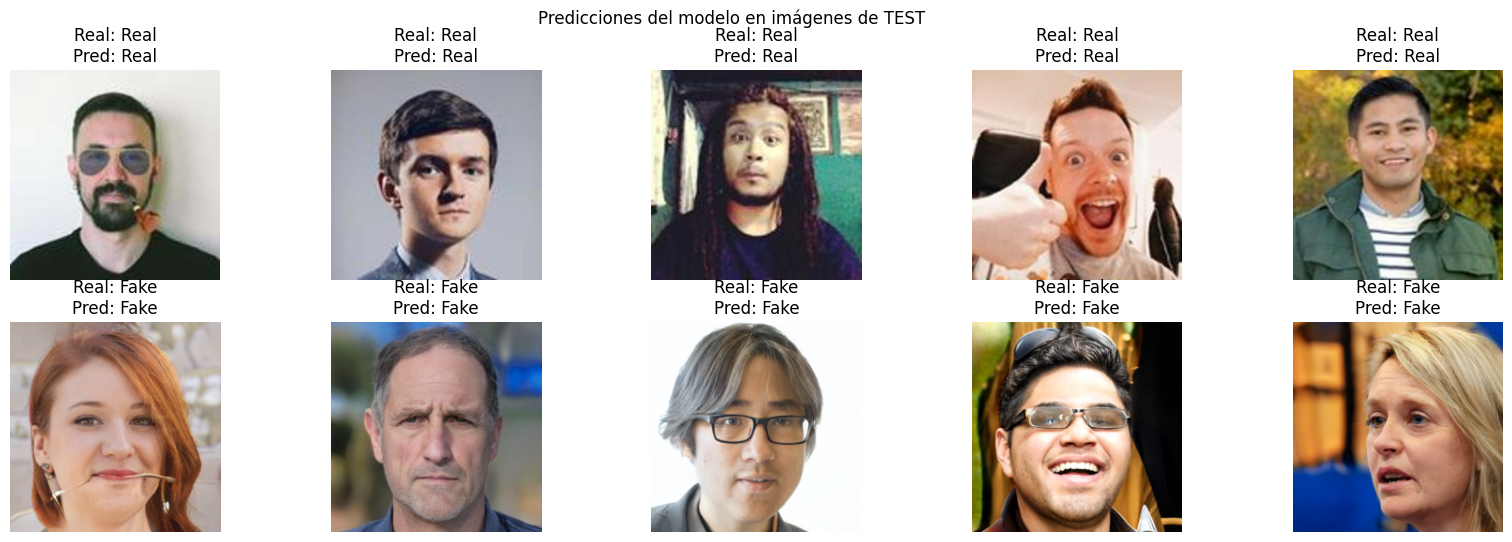

In [45]:
import os
import torch
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
from torchvision import models
import torch.nn as nn

# ===============================
# Dataset de TEST
# ===============================
class TestDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.real_dir = os.path.join(root_dir, "reales")
        self.fake_dir = os.path.join(root_dir, "sinteticas")

        self.real_imgs = [(os.path.join(self.real_dir, f), 1.0)
                          for f in sorted(os.listdir(self.real_dir)) if f.endswith((".jpg",".png"))]
        self.fake_imgs = [(os.path.join(self.fake_dir, f), 0.0)
                          for f in sorted(os.listdir(self.fake_dir)) if f.endswith((".jpg",".png"))]

        self.samples = self.real_imgs + self.fake_imgs
        self.transform = transform

    def __len__(self):
        return len(self.samples)

    def __getitem__(self, idx):
        path, label = self.samples[idx]
        img = Image.open(path).convert("RGB")
        if self.transform:
            img = self.transform(img)
        return img, torch.tensor(label, dtype=torch.float32), path

# ===============================
# Transformaciones
# ===============================
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485,0.456,0.406],
                         std=[0.229,0.224,0.225])
])

# ===============================
# Modelo
# ===============================
class FakeFaceClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.backbone = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
        num_features = self.backbone.fc.in_features
        self.backbone.fc = nn.Linear(num_features, 1)

    def forward(self, x):
        return self.backbone(x).squeeze(1)

# ===============================
# Cargar modelo entrenado
# ===============================
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FakeFaceClassifier().to(device)
model.load_state_dict(torch.load("/content/fakeface_model_10x10.pth", map_location=device))
model.eval()

# ===============================
# Dataset de TEST
# ===============================
test_root = "/content/fake_faces_test_nuevas"  # carpeta con 5 reales + 5 falsas
test_dataset = TestDataset(test_root, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# ===============================
# Testeo y visualización
# ===============================
plt.figure(figsize=(20,6))
for i, (img, label, path) in enumerate(test_loader):
    img = img.to(device)
    with torch.no_grad():
        output = model(img)
        prob = torch.sigmoid(output).item()
        pred = 1 if prob >= 0.5 else 0

    # Mostrar imagen
    img_np = img.cpu().squeeze().permute(1,2,0).numpy()
    img_np = (img_np * np.array([0.229,0.224,0.225]) + np.array([0.485,0.456,0.406]))  # denormalizar
    img_np = np.clip(img_np,0,1)

    plt.subplot(2,5,i+1)
    plt.imshow(img_np)
    plt.axis('off')
    plt.title(f"Real: {'Real' if label.item()==1 else 'Fake'}\nPred: {'Real' if pred==1 else 'Fake'}")
plt.suptitle("Predicciones del modelo en imágenes de TEST")
plt.show()
